### Monte Carlo Simulation of Profit Margin

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import statistics

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
plt.rcParams["figure.facecolor"] = "w"

In [11]:
df= pd.read_csv('data.csv')
returns = df.pct_change()
meanReturns = returns.mean()
stdReturns = returns.std()

In [12]:
# Parameters

# drift coefficent
mu_brick = meanReturns['Brick']
mu_plastic = meanReturns['Plastic']
# number of steps
n = 5
# time in years
T = 5
# number of sims
M = 10000
# initial price
S0_brick = 0.01
S0_plastic = 0.08
# volatility
sigma_brick = stdReturns['Brick']
sigma_plastic = stdReturns['Plastic']

dt = T/n

In [13]:
np.random.seed(1)
# calc each time step
dt = T/n
# simulation of sand price
p_brick = np.exp(
    (mu_brick - sigma_brick ** 2 / 2) * dt
    + sigma_brick * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
p_brick = np.vstack([np.ones(M), p_brick])
p_brick = S0_brick * p_brick.cumprod(axis=0)

# simulation of plastic price
p_plastic = np.exp(
    (mu_plastic - sigma_plastic ** 2 / 2) * dt
    + sigma_plastic * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
p_plastic = np.vstack([np.ones(M), p_plastic])
p_plastic = S0_plastic * p_plastic.cumprod(axis=0)


p_full = p_plastic + p_brick

##### Price Plot

<function matplotlib.pyplot.show(close=None, block=None)>

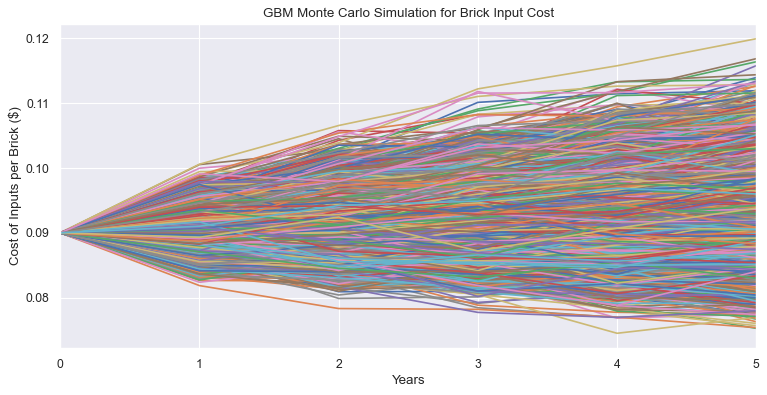

In [26]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 5), dpi=80)
sns.set(style="darkgrid")

plt.plot(p_full)
plt.xlabel("Years")
plt.ylabel("Cost of Inputs per Brick ($)")
plt.title("GBM Monte Carlo Simulation for Brick Input Cost")
plt.xlim([0, n])

plt.show

In [22]:
p_df = pd.DataFrame(p_full.T)

In [25]:
pers = 50

var1 = scs.scoreatpercentile(p_full[1], pers)
var2 = scs.scoreatpercentile(p_full[2], pers)
var3 = scs.scoreatpercentile(p_full[3], pers)
var4 = scs.scoreatpercentile(p_full[4], pers)
var5 = scs.scoreatpercentile(p_full[5], pers)


year = [2023,2024,2025,2026,2027]
var = [var1,var2,var3,var4,var5]

var_df = pd.DataFrame({'Year' : year, 
                       'Price' : var})

avg = list(var_df['Price'])
avg.insert(0, 0.05)

var_df

,Year,Price
0,2023,0.090710
1,2024,0.091387
2,2025,0.092077
3,2026,0.092818
4,2027,0.093636


##### Profit Plot

<function matplotlib.pyplot.show(close=None, block=None)>

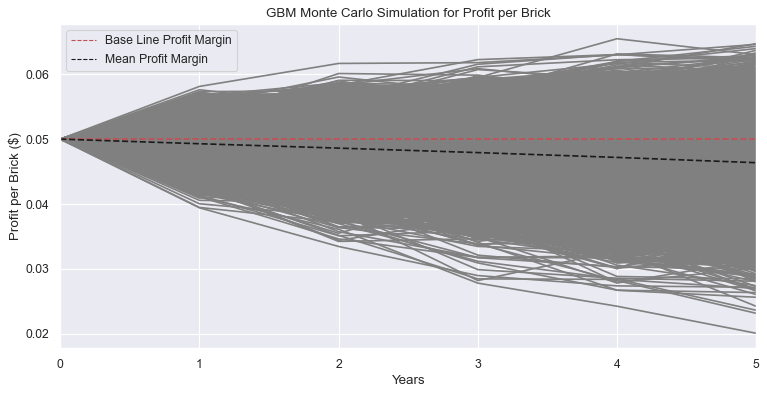

In [21]:
price = 0.14
profit = price - p_full

plt.figure(figsize=(10, 5), dpi=80)
sns.set(style="darkgrid")

plt.plot(profit, c='gray')
plt.xlabel("Years")
plt.ylabel("Profit per Brick ($)")
plt.title("GBM Monte Carlo Simulation for Profit per Brick")
plt.xlim([0, n])

plt.axhline(0.05, c='r', linestyle = 'dashed')
plt.plot(avg,c='k', linestyle = 'dashed')

custom_lines = [Line2D([0], [0], c = 'r',linestyle = 'dashed', lw=1), Line2D([0], [0], c = 'k',linestyle = 'dashed', lw=1)]

plt.legend(custom_lines, ['Base Line Profit Margin', 'Mean Profit Margin'])
plt.show

In [15]:
p_df = pd.DataFrame(profit.T)

In [16]:
pers = 50

var1 = scs.scoreatpercentile(p_df[1], pers)
var2 = scs.scoreatpercentile(p_df[2], pers)
var3 = scs.scoreatpercentile(p_df[3], pers)
var4 = scs.scoreatpercentile(p_df[4], pers)
var5 = scs.scoreatpercentile(p_df[5], pers)


year = [2023,2024,2025,2026,2027]
var = [var1,var2,var3,var4,var5]

var_df = pd.DataFrame({'Year' : year, 
                       'Profit' : var})

avg = list(var_df['Profit'])
avg.insert(0, 0.05)

var_df

,Year,Profit
0,2023,0.049290
1,2024,0.048613
2,2025,0.047923
3,2026,0.047182
4,2027,0.046364


In [17]:
inc = list(0.05*np.ones((6,), dtype=int) - np.array(avg))
inc.remove(inc[0])
var_df = pd.DataFrame({'Year' : year, 
                       'Price Increase' : inc})

In [18]:
var_df

,Year,Price Increase
0,2023,0.000710
1,2024,0.001387
2,2025,0.002077
3,2026,0.002818
4,2027,0.003636


In [19]:
pers = 0.05

var1 = 100 - scs.percentileofscore(p_df[1], pers)
var2 = 100 - scs.percentileofscore(p_df[2], pers)
var3 = 100 - scs.percentileofscore(p_df[3], pers)
var4 = 100 - scs.percentileofscore(p_df[4], pers)
var5 = 100 - scs.percentileofscore(p_df[5], pers)


year = [2023,2024,2025,2026,2027]
var = [var1,var2,var3,var4,var5]

var_df = pd.DataFrame({'Year' : year, 
                       'Percentile' : var})
var_df

,Year,Percentile
0,2023,38.78
1,2024,34.49
2,2025,31.10
3,2026,28.60
4,2027,26.37


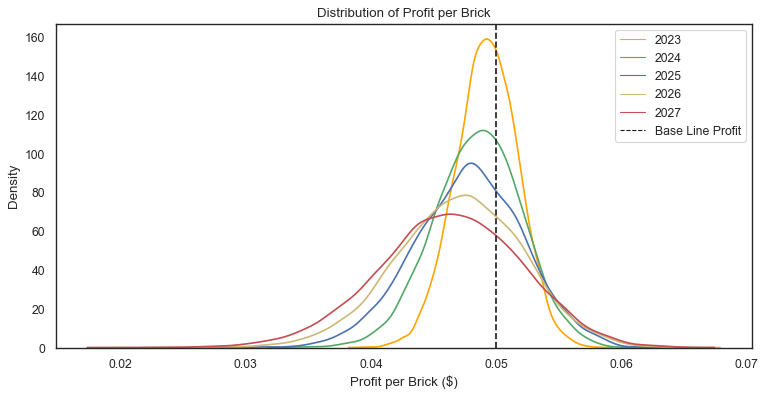

In [20]:
plt.figure(figsize=(10, 5), dpi=80)
sns.set(style="white")
sns.kdeplot(p_df[1], c = 'orange')
sns.kdeplot(p_df[2], c = 'g')
sns.kdeplot(p_df[3], c = 'b')
sns.kdeplot(p_df[4], c = 'y')
sns.kdeplot(p_df[5], c = 'r')
plt.title("Distribution of Profit per Brick")
plt.xlabel("Profit per Brick ($)")

custom_lines = [Line2D([0], [0], c = 'orange', lw=1),
                Line2D([0], [0], c = 'g', lw=1),
                Line2D([0], [0], c = 'b', lw=1), 
                Line2D([0], [0], c = 'y', lw=1), 
                Line2D([0], [0], c = 'r', lw=1), 
                Line2D([0], [0], c = 'k', lw=1, linestyle = 'dashed')]

plt.legend(custom_lines, ['2023', '2024', '2025', '2026','2027', 'Base Line Profit'])
plt.axvline(0.05,c='k', linestyle = 'dashed')

plt.show()